### Cobb-Douglas Production Function

The **Cobb-Douglas production function** is a widely used economic model that describes the relationship between output (Y) and the inputs of capital (K) and labor (L).

$Y = A \cdot K^{\alpha} \cdot L^{1-\alpha}$

#### Components:
1. **\( Y \)**: Total output or production.
2. **\( A \)**: Total factor productivity (TFP), representing technological efficiency or other factors influencing output beyond labor and capital.
3. **\( K \)**: Input of capital (e.g., machines, buildings, tools).
4. **\( L \)**: Input of labor (e.g., workforce, hours worked).
5. **\( $\alpha$ \)**: Output elasticity of capital, representing the proportionate contribution of capital to output.


#### Key Properties:
1. **Constant Returns to Scale**:
- If the inputs \( K \) and \( L \) are scaled proportionally, output \( Y \) scales by the same factor:
     $Y(\lambda K, \lambda L) = \lambda Y(K, L)$
2. **Diminishing Marginal Returns**:
- Increasing either \( K \) or \( L \) while holding the other constant leads to a decreasing rate of output growth.
3. **Factor Substitution**:
- Capital and labor can substitute for one another, meaning the function allows for flexibility in their relative usage.

#### Application:
The Cobb-Douglas function is widely used in:
- Economic growth modeling (e.g., Solow-Swan growth model).
- Production efficiency analysis in firms.
- Policy analysis to understand the contribution of labor and capital to GDP.

In practical use, parameters (\( A \), \( $\alpha$ \)) are estimated from data to reflect the specific characteristics of the economy or firm being studied.


In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.optimize import minimize

In [2]:
PWT = pd.read_csv('PWT2021.csv')
PWT.head()

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
0,ABW,Aruba,Aruban Guilder,1950,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,Aruban Guilder,1951,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,Aruban Guilder,1952,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,Aruban Guilder,1953,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,Aruban Guilder,1954,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Filter to leave only necessary columns
df = PWT[['country', 'year', 'rgdpe', 'cn', 'emp']].copy()
df.columns = [
    'Country',
    'Year', 
    'Real GDP (mil 2017US$)', 
    'Capital Stock (mil 2017US$)', 
    'Employment (millions)'
]

df['Real GDP (mil 2017US$)'] = df['Real GDP (mil 2017US$)'].round(2)
df['Capital Stock (mil 2017US$)'] = df['Capital Stock (mil 2017US$)'].round(2)
df['Employment (millions)'] = df['Employment (millions)'].round(2)
df

,Country,Year,Real GDP (mil 2017US$),Capital Stock (mil 2017US$),Employment (millions)
0,Aruba,1950,NaN,NaN,NaN
1,Aruba,1951,NaN,NaN,NaN
2,Aruba,1952,NaN,NaN,NaN
3,Aruba,1953,NaN,NaN,NaN
4,Aruba,1954,NaN,NaN,NaN
...,...,...,...,...,...
12805,Zimbabwe,2015,40142.0,51969.0,6.0
12806,Zimbabwe,2016,41875.0,54424.0,7.0
12807,Zimbabwe,2017,44672.0,56829.0,7.0
12808,Zimbabwe,2018,44325.0,58313.0,7.0


In [4]:
# Filter the dataframe to keep only rows from 1955 onwards
df_filtered = df[df['Year'] > 1954]

# Check for countries with no missing values in all columns
countries_no_missing = df_filtered.groupby('Country').apply(
    lambda group: group.isnull().sum().sum() == 0
)

# Extract the list of countries with no missing values
countries_no_missing_list = countries_no_missing[countries_no_missing].index.tolist()

len(countries_no_missing_list)

67

In [5]:
df = df_filtered[df_filtered['Country'].isin(countries_no_missing_list)]
df

,Country,Year,Real GDP (mil 2017US$),Capital Stock (mil 2017US$),Employment (millions)
355,Argentina,1955,56628.0,80596.0,7.0
356,Argentina,1956,58045.0,84654.0,7.0
357,Argentina,1957,60745.0,87753.0,7.0
358,Argentina,1958,65418.0,93119.0,7.0
359,Argentina,1959,62026.0,96384.0,8.0
...,...,...,...,...,...
12805,Zimbabwe,2015,40142.0,51969.0,6.0
12806,Zimbabwe,2016,41875.0,54424.0,7.0
12807,Zimbabwe,2017,44672.0,56829.0,7.0
12808,Zimbabwe,2018,44325.0,58313.0,7.0


In [6]:
#Group by country
df_country_averages = df.groupby('Country').agg(
    Years_Count=('Year', 'count'),
    Average_Real_GDP=('Real GDP (mil 2017US$)', 'mean'),
    Average_Capital_Stock=('Capital Stock (mil 2017US$)', 'mean'),
    Average_Employment=('Employment (millions)', 'mean')
).reset_index()

df_country_averages.columns = [ 'Country',
    'Years Count',
    'Average Real GDP (mil 2017US$)',
    'Average Capital Stock (mil 2017US$)',
    'Average Employment (millions)']

df_country_averages['Average Real GDP (mil 2017US$)'] = df_country_averages['Average Real GDP (mil 2017US$)'].round(2)
df_country_averages['Average Capital Stock (mil 2017US$)'] = df_country_averages['Average Capital Stock (mil 2017US$)'].round(2)
df_country_averages['Average Employment (millions)'] = df_country_averages['Average Employment (millions)'].round(2)

df_country_averages.head()

,Country,Years Count,Average Real GDP (mil 2017US$),Average Capital Stock (mil 2017US$),Average Employment (millions)
0,Argentina,65,349617.05,1093197.42,12.11
1,Australia,65,554077.31,2421124.57,7.54
2,Austria,65,224882.29,938572.86,3.51
3,Belgium,65,285766.35,1236620.85,4.05
4,Bolivia (Plurinational State of),65,26479.97,54337.83,3.05


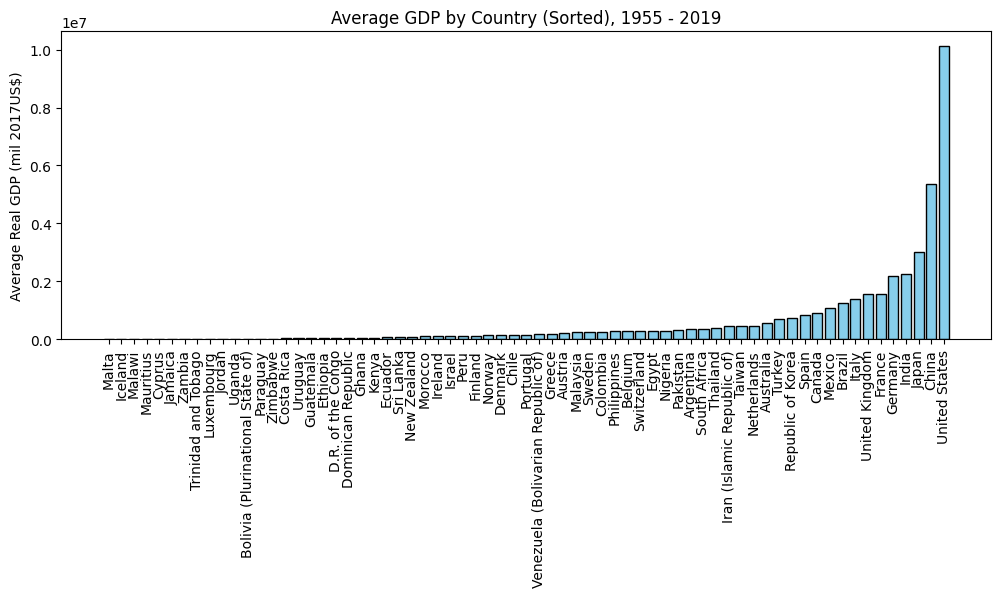

In [7]:
# Bar plot for Average GDP
gdp_sorted = df_country_averages.sort_values(by='Average Real GDP (mil 2017US$)')
plt.figure(figsize=(12, 4))
plt.bar(gdp_sorted['Country'], gdp_sorted['Average Real GDP (mil 2017US$)'], color='skyblue', edgecolor='black')
plt.title('Average GDP by Country (Sorted), 1955 - 2019')
plt.ylabel('Average Real GDP (mil 2017US$)')
plt.xticks(rotation=90)
plt.show()

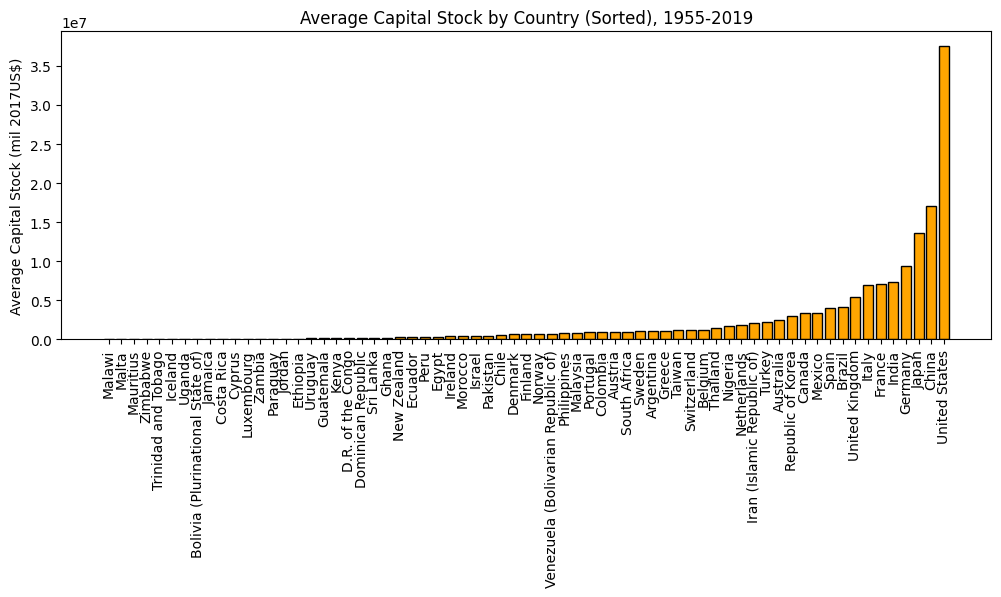

In [8]:
# Bar plot for Average Capital Stock
capital_sorted = df_country_averages.sort_values(by='Average Capital Stock (mil 2017US$)')
plt.figure(figsize=(12, 4))
plt.bar(capital_sorted['Country'], capital_sorted['Average Capital Stock (mil 2017US$)'], color='orange', edgecolor='black')
plt.title('Average Capital Stock by Country (Sorted), 1955-2019')
plt.ylabel('Average Capital Stock (mil 2017US$)')
plt.xticks(rotation=90)
plt.show()

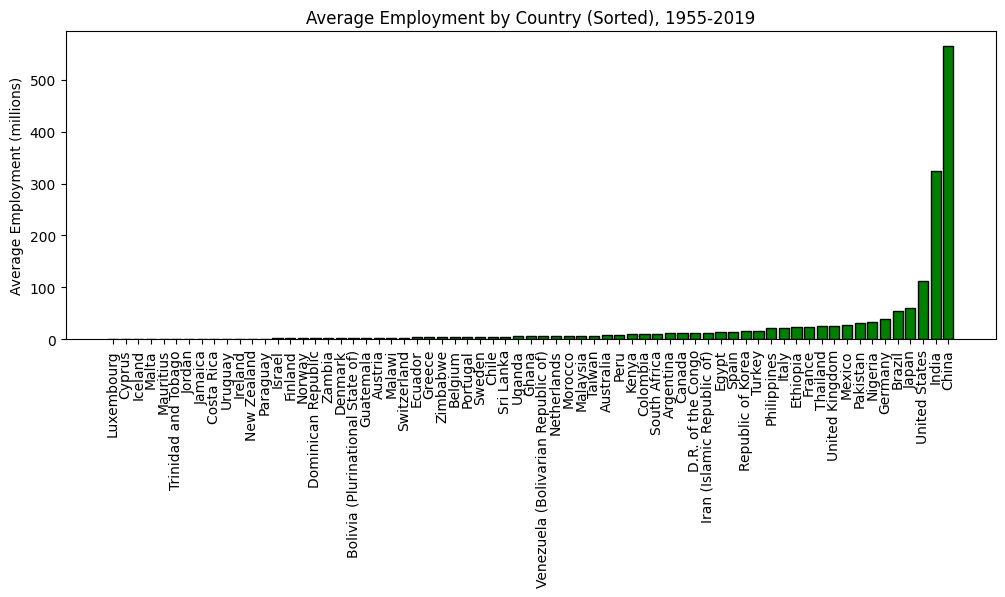

In [9]:
# Bar plot for Average Employment
employment_sorted = df_country_averages.sort_values(by='Average Employment (millions)')
plt.figure(figsize=(12, 4))
plt.bar(employment_sorted['Country'], employment_sorted['Average Employment (millions)'], color='green', edgecolor='black')
plt.title('Average Employment by Country (Sorted), 1955-2019')
plt.ylabel('Average Employment (millions)')
plt.xticks(rotation=90)
plt.show()

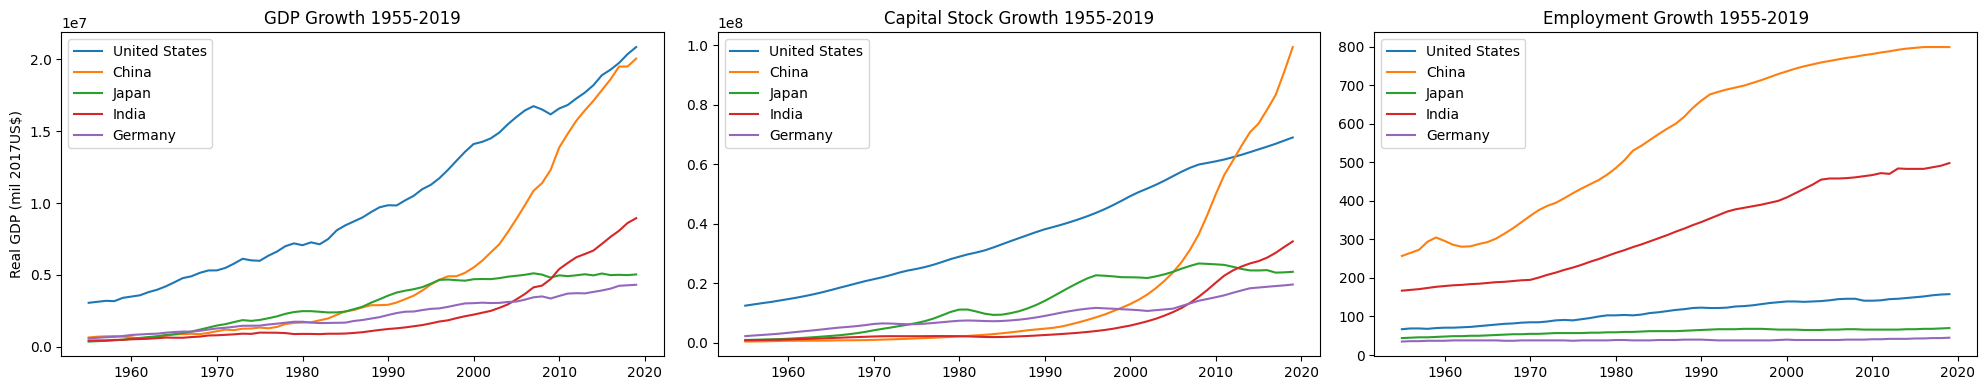

In [10]:
selected_countries = ['United States', 'China', 'Japan', 'India', 'Germany']
df_selected = df[df['Country'].isin(selected_countries)]
fig, axes = plt.subplots(1, 3, figsize=(20, 4), sharey=False)

for country in selected_countries: # GDP Growth Plot
    subset = df_selected[df_selected['Country'] == country]
    axes[0].plot(subset['Year'], subset['Real GDP (mil 2017US$)'], label=country)
axes[0].set_title('GDP Growth 1955-2019')
axes[0].set_ylabel('Real GDP (mil 2017US$)')
axes[0].legend()

for country in selected_countries: # Capital Stock Growth Plot
    subset = df_selected[df_selected['Country'] == country]
    axes[1].plot(subset['Year'], subset['Capital Stock (mil 2017US$)'], label=country)
axes[1].set_title('Capital Stock Growth 1955-2019')
axes[1].legend()

for country in selected_countries: # Employment Growth Plot
    subset = df_selected[df_selected['Country'] == country]
    axes[2].plot(subset['Year'], subset['Employment (millions)'], label=country)
axes[2].set_title('Employment Growth 1955-2019')
axes[2].legend()

plt.tight_layout()
plt.show()

In [11]:
df5 = df[df['Country'].isin(['United States', 'China', 'Japan', 'India', 'Germany'])]
df5.head(1)

,Country,Year,Real GDP (mil 2017US$),Capital Stock (mil 2017US$),Employment (millions)
2315,China,1955,642037.0,427434.0,257.0


### Fitting the model

To fit the regression we need to linearize the Cobb-Douglas function:

$ln Y = \ln A + \beta_1 \ln K + \beta_2 \ln L + \beta_3 t$

Where:
- \( $\ln A$ \): Logarithm of total factor productivity (TFP).
- \( $\beta_1$, $\beta_2$ \): Output elasticities for capital (K) and labor (L).
- \( $\beta_3$ \): Time trend (growth rate due to factors like technological progress).

Two key metrics: $R^2$ and $MSE$ will be used to evaluate model performance.

In [12]:
#Prepare data to fit the model (take ln)
df5 = df[df['Country'].isin(['United States', 'China', 'Japan', 'India', 'Germany'])].copy()

df5['t'] = df5.groupby('Country')['Year'].transform(lambda x: x - x.iloc[0])
df5['lnY'] = np.log(df5['Real GDP (mil 2017US$)'])
df5['lnK'] = np.log(df5['Capital Stock (mil 2017US$)'])
df5['lnL'] = np.log(df5['Employment (millions)'])

df5.head(5)

,Country,Year,Real GDP (mil 2017US$),Capital Stock (mil 2017US$),Employment (millions),t,lnY,lnK,lnL
2315,China,1955,642037.0,427434.0,257.0,0,13.372401,12.965555,5.549076
2316,China,1956,693936.0,456440.0,265.0,1,13.450135,13.031213,5.579730
2317,China,1957,718619.0,486750.0,273.0,2,13.485087,13.095506,5.609472
2318,China,1958,732356.0,542504.0,294.0,3,13.504022,13.203951,5.683580
2319,China,1959,698911.0,625968.0,305.0,4,13.457279,13.347055,5.720312


In [13]:
# Define the regression function
def regression_with_metrics(params, X, y):
    beta1 = params[0]
    beta2 = 1 - beta1  # beta1 + beta2 = 1
    beta3 = params[1]
    intercept = params[2]
    predictions = intercept + beta1 * X['lnK'] + beta2 * X['lnL'] + beta3 * X['t']
    residuals = y - predictions
    return np.sum(residuals**2), predictions 

In [14]:
# Fit the model
def fit_country_with_metrics(data, country):
    country_data = data[data['Country'] == country]
    X = country_data[['lnK', 'lnL', 't']]
    y = country_data['lnY']
    initial_params = [0.5, 0.0, 0.0]  # initial guess: beta1, beta3, intercept
    constraints = [ {'type': 'ineq', 'fun': lambda params: params[0]},        # beta1 > 0
        {'type': 'ineq', 'fun': lambda params: 1 - params[0]},]    #beta2 > 0 (implied as beta1 + beta2 = 1)
    
    # Optimize
    result = minimize(lambda params: regression_with_metrics(params, X, y)[0],  # Minimize residual sum
        x0=initial_params, 
        constraints=constraints,
        method='SLSQP')
    
    # Extract parameters
    beta1 = result.x[0]
    beta2 = 1 - beta1
    beta3 = result.x[1]
    intercept = result.x[2]
    
    # Evaluation
    _, predictions = regression_with_metrics(result.x, X, y)
    r2 = r2_score(y, predictions)
    mse = mean_squared_error(y, predictions)
    
    return {'Country': country,
        'Intercept (lnA)': intercept,
        'A (e^lnA)': np.exp(intercept),
        'Beta1 (lnK)': beta1,
        'Beta2 (lnL)': beta2,
        'Beta3 (t)': beta3,
        'R2': r2,
        'MSE': mse}

In [15]:
# Apply to each country
results_with_metrics = []
for country in df5['Country'].unique():
    results_with_metrics.append(fit_country_with_metrics(df5, country))

results_with_metrics_df = pd.DataFrame(results_with_metrics)
results_with_metrics_df

,Country,Intercept (lnA),A (e^lnA),Beta1 (lnK),Beta2 (lnL),Beta3 (t),R2,MSE
0,China,2.719083,15.166408,0.667921,0.332079,-0.006050,0.995285,0.005891
1,Germany,3.070258,21.547450,0.601012,0.398988,0.011384,0.983676,0.005059
2,India,2.027200,7.592797,0.673654,0.326346,0.002915,0.997408,0.002024
3,Japan,1.664172,5.281299,0.749534,0.250466,-0.000897,0.993750,0.004025
4,United States,2.391520,10.930091,0.685678,0.314322,0.007369,0.997392,0.000863


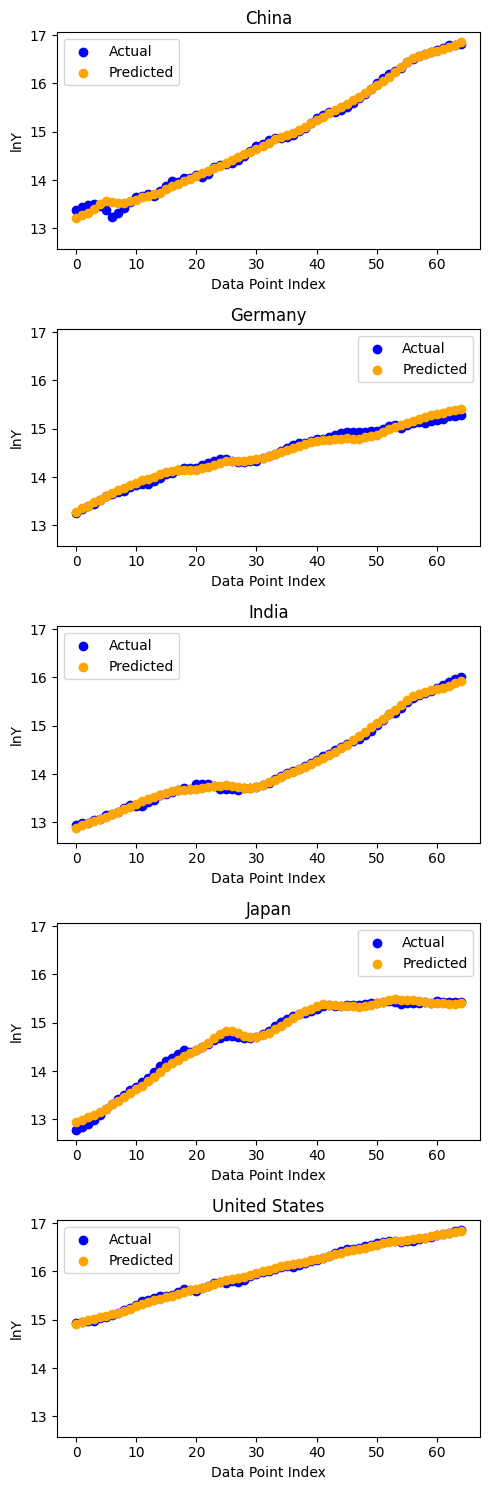

In [16]:
# Plot actual vs predicted for each country
fig, axes = plt.subplots(5, 1, figsize=(5, 15), sharey=True)

for i, country in enumerate(df5['Country'].unique()):
    country_data = df5[df5['Country'] == country] #get country's data
    X = country_data[['lnK', 'lnL', 't']]
    y_actual = country_data['lnY']
    
    result = fit_country_with_metrics(df5, country)   # Get predictions for the country using fitted coefficients
    intercept, beta1, beta2, beta3 = result['Intercept (lnA)'], result['Beta1 (lnK)'], result['Beta2 (lnL)'], result['Beta3 (t)']
    y_pred = intercept + beta1 * X['lnK'] + beta2 * X['lnL'] + beta3 * X['t']
    
    axes[i].scatter(range(len(y_actual)), y_actual, label='Actual', color='blue')
    axes[i].scatter(range(len(y_pred)), y_pred, label='Predicted', color='orange')
    axes[i].set_title(country)
    axes[i].set_xlabel('Data Point Index')
    axes[i].set_ylabel('lnY')
    axes[i].legend()

plt.tight_layout()
plt.show()

### Country-by-Country Analysis

#### **China**:
- **Intercept ($ln A$)**: 2.72 → $A = 15.17$: High productivity level compared to others, reflecting rapid industrialization and technological progress since the 1990s.
- **Capital Elasticity ($\beta_1$)**: 0.668 → Capital contributes about 67% to output growth.
- **Labor Elasticity ($\beta_2$)**: 0.332 → Labor contributes about 33% to output growth.
- **Time Trend ($\beta_3$)**: -0.006 → Slight negative trend, possibly reflecting slower efficiency growth recently.
- **Performance ($R^2 = 0.995$, $MSE = 0.0059$)**: Excellent fit with high explanatory power and low prediction error.

#### **Germany**:
- **Intercept ($ln A$)**: 3.07 → $A = 21.55$: High productivity, reflecting Germany's advanced economy and industrial base.
- **Capital Elasticity ($\beta_1$)**: 0.601 → Capital contributes 60% to output growth.
- **Labor Elasticity ($\beta_2$)**: 0.399 → Labor contributes 40% to output growth.
- **Time Trend ($\beta_3$)**: 0.011 → Positive time trend, indicating modest technological improvements.
- **Performance ($R^2 = 0.984$, $MSE = 0.0051$)**: Good model fit, though slightly weaker than others due to Germany's mature economy with stable productivity.

#### **India**:
- **Intercept ($ln A$)**: 2.03 → $A = 7.59$: Relatively low productivity compared to others, reflecting a developing economy.
- **Capital Elasticity ($\beta_1$)**: 0.674 → Capital contributes about 67% to output growth.
- **Labor Elasticity ($\beta_2$)**: 0.326 → Labor contributes about 33% to output growth.
- **Time Trend ($\beta_3$)**: 0.003 → Slight positive trend, reflecting gradual technological improvements.
- **Performance ($R^2 = 0.997$, $MSE = 0.0020$)**: Outstanding fit, showing the model explains nearly all variance in output.

#### **Japan**:
- **Intercept ($ln A$)**: 1.66 → $A = 5.28$: Lower productivity compared to others, likely reflecting stagnation in economic growth since the 1990s.
- **Capital Elasticity ($\beta_1$)**: 0.750 → Capital dominates output growth with 75% contribution.
- **Labor Elasticity ($\beta_2$)**: 0.250 → Labor contributes only 25% to output growth.
- **Time Trend ($\beta_3$)**: -0.001 → No significant growth or decline in productivity.
- **Performance ($R^2 = 0.994$, $MSE = 0.0040$)**: Excellent fit, consistent with stable but slower growth dynamics.

#### **United States**:
- **Intercept ($ln A$)**: 2.39 → $A = 10.93$: High productivity, reflective of technological advancements and a robust economy.
- **Capital Elasticity ($\beta_1$)**: 0.686 → Capital contributes about 69% to output growth.
- **Labor Elasticity ($\beta_2$)**: 0.314 → Labor contributes about 31% to output growth.
- **Time Trend ($\beta_3$)**: 0.007 → Positive trend, reflecting consistent technological progress.
- **Performance ($R^2 = 0.997$, $MSE = 0.0009$)**: Best model fit among all countries, with extremely high explanatory power and negligible prediction error.

---

### Overall Observations:
1. **Capital Dominance**:
   - Across all countries, $\beta_1 > \beta_2$, indicating that capital has a stronger influence on output than labor.

2. **Productivity ($A$)**:
   - Germany and China show the highest $A$, reflecting advanced industrial bases and high efficiency.
   - India and Japan have lower $A$, consistent with their respective stages of economic development.

3. **Model Fit**:
   - All models have high $R^2$ values, indicating that the Cobb-Douglas function explains output variation well.

4. **Time Trends**:
   - Positive trends ($\beta_3$) in Germany, India, and the US highlight technological improvements.
   - Slightly negative trends for China and Japan may indicate periods of slower growth or efficiency stagnation.


In [17]:
#Prepare data to fit the model (take ln)
df55 = df[df['Country'].isin(['Ethiopia', 'Pakistan', 'Thailand', 'Colombia', 'Mexico'])].copy()

df55['t'] = df55.groupby('Country')['Year'].transform(lambda x: x - x.iloc[0])
df55['lnY'] = np.log(df55['Real GDP (mil 2017US$)'])
df55['lnK'] = np.log(df55['Capital Stock (mil 2017US$)'])
df55['lnL'] = np.log(df55['Employment (millions)'])

results_with_metrics = []
for country in df55['Country'].unique():
    results_with_metrics.append(fit_country_with_metrics(df55, country))

results_with_metrics_df = pd.DataFrame(results_with_metrics)
results_with_metrics_df

,Country,Intercept (lnA),A (e^lnA),Beta1 (lnK),Beta2 (lnL),Beta3 (t),R2,MSE
0,Colombia,5.364659,213.718380,0.381417,0.618583,0.009899,0.969972,0.017493
1,Ethiopia,5.040613,154.564773,0.326590,0.673410,-0.002095,0.935430,0.042401
2,Mexico,4.684168,108.220213,0.510344,0.489656,-0.001506,0.978385,0.012040
3,Pakistan,6.349738,572.342820,0.241403,0.758597,0.014617,0.994521,0.004471
4,Thailand,5.931325,376.653107,0.223703,0.776297,0.029886,0.992018,0.011824


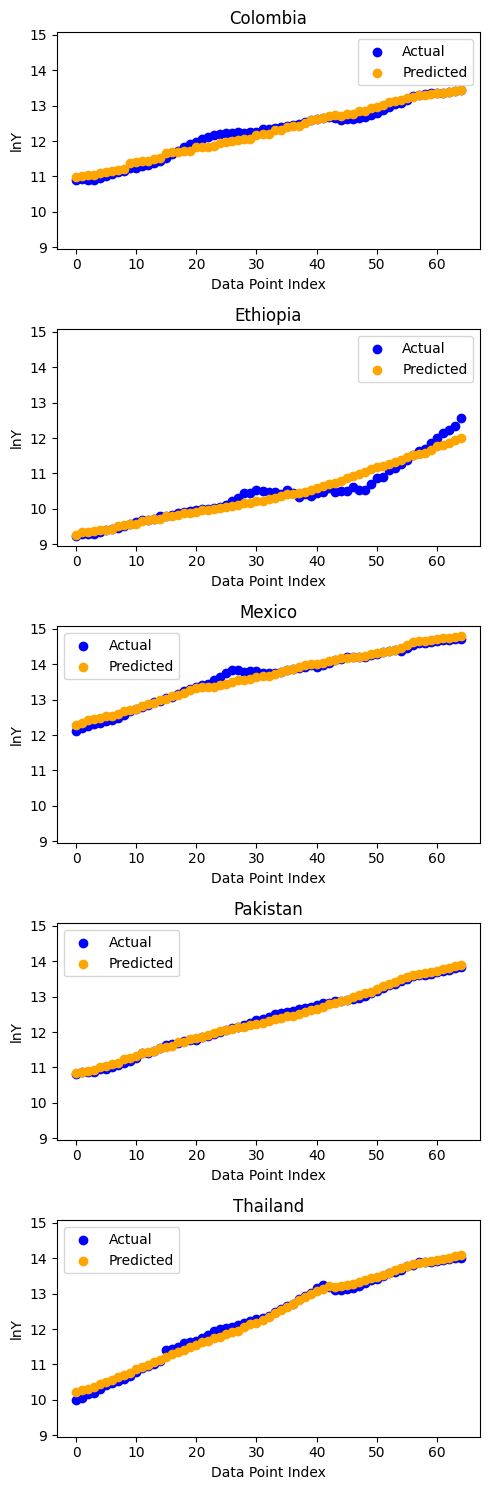

In [18]:
# Plot actual vs predicted for each country
fig, axes = plt.subplots(5, 1, figsize=(5, 15), sharey=True)

for i, country in enumerate(df55['Country'].unique()):
    country_data = df55[df55['Country'] == country] #get country's data
    X = country_data[['lnK', 'lnL', 't']]
    y_actual = country_data['lnY']
    
    result = fit_country_with_metrics(df55, country)   # Get predictions for the country using fitted coefficients
    intercept, beta1, beta2, beta3 = result['Intercept (lnA)'], result['Beta1 (lnK)'], result['Beta2 (lnL)'], result['Beta3 (t)']
    y_pred = intercept + beta1 * X['lnK'] + beta2 * X['lnL'] + beta3 * X['t']
    
    axes[i].scatter(range(len(y_actual)), y_actual, label='Actual', color='blue')
    axes[i].scatter(range(len(y_pred)), y_pred, label='Predicted', color='orange')
    axes[i].set_title(country)
    axes[i].set_xlabel('Data Point Index')
    axes[i].set_ylabel('lnY')
    axes[i].legend()

plt.tight_layout()
plt.show()